In [11]:
import os
import datetime as dt
import pandas as pd
from ochre import Dwelling, CreateFigures
# from ochre import Analysis
# Get project root (one level up from bin/)
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
defaults_dir = os.path.join(PROJECT_ROOT, "ochre", "defaults")
# Test script to run single Dwelling

In [12]:

dwelling_args = {
    "name": "MyHouse",  # simulation name
    #
    # Timing parameters
    "start_time": dt.datetime(2018, 1, 1, 0, 0),  # year, month, day, hour, minute
    "time_res": dt.timedelta(minutes=15),         # time resolution of the 
    # simulation
    "duration": dt.timedelta(days=1),             # duration of the simulation
    "initialization_time": dt.timedelta(days=1),  # used to create realistic starting temperature
    # "time_zone": None,                          # option to specify daylight savings, in development
    #
    # Input files
    "hpxml_file": os.path.join(defaults_dir, "Input Files",
                               "bldg0112631-up11.xml"),
    "hpxml_schedule_file": os.path.join(defaults_dir, "Input Files",
                                        "bldg0112631_schedule.csv"
    ),
    "weather_file": os.path.join(defaults_dir,"Weather",
                                 "USA_CO_Denver.Intl.AP.725650_TMY3.epw"
    ),
    # note: weather_path can be used when Weather Station is specified in HPXML file
    # "weather_path": weather_path,
    #
    # Output parameters
    # "verbosity": 3,                       # verbosity of time series files (0-9)
    # "metrics_verbosity": 3,               # verbosity of metrics file (0-9)
    # "save_results": False,                # saves results to files. Defaults to True if verbosity > 0
    "output_path": os.getcwd(),             # defaults to hpxml_file path
    # "save_args_to_json": True,            # includes data from this dictionary in the json file
    # "output_to_parquet": True,            # saves time series files as parquet files (False saves as csv files)
    # "save_schedule_columns": [],          # list of time series inputs to save to schedule file
    # "export_res": dt.timedelta(days=61),  # time resolution for saving files, to reduce memory requirements
    #
    # Envelope parameters
    # "Envelope": {
    #     "save_results": True,  # Saves detailed envelope inputs and states
    #     "verbosity": 9,
    #     "linearize_infiltration": True,
    #     "external_radiation_method": "linear",
    #     "internal_radiation_method": "linear",
    #     "reduced_states": 10,
    #     "save_matrices": True,
    #     "zones": {
    #         "Indoor": {
    #             "Thermal Mass Multiplier": 10,
    #         }
    #     },
    # },
    #
    # Occupancy parameters
    # "Occupancy": {
    #     "Number of Occupants (-)": 3,
    # },
    #
    # Equipment parameters
    "Equipment": {
        # HVAC equipment
        # Note: dictionary key can be end use (e.g., HVAC Heating) or specific equipment name (e.g., Gas Furnace)
        # "HVAC Heating": {
        #     "use_ideal_capacity": True,
        # },
        # "HVAC Cooling": {
        #     "use_ideal_capacity": True,
        # },
        # "Air Conditioner": {},
        # "Gas Furnace": {
        #     "EIR (-)": 1.1,
        # },
        # "Air Source Heat Pump": {
        #     "Backup Setpoint Offset (C)": 3,
        #     "Backup Lockout Time (minutes)": 10,
        #     "Backup Soft Lockout Time (minutes)": 20,
        # },
        #
        # Water heating equipment
        # Note: dictionary key can be end use (Water Heating) or specific equipment name (e.g., Gas Water Heater)
        # "Water Heating": {
        #     "water_nodes": 1,
        #     "Water Tank": {
        #         "save_results": True,
        #     },
        #     "save_ebm_results": True,
        # },
        # "Heat Pump Water Heater": {
        #     "HPWH COP (-)": 4.5,
        #     "hp_only_mode": True
        # },
        # "Electric Resistance Water Heater": {
        #     "use_ideal_capacity": True,
        # },
        #
        # Other equipment
        # "EV": {
        #     "vehicle_type": "BEV",
        #     "charging_level": "Level 1",
        #     "range": 150,
        # },
        # "PV": {
        #     "capacity": 5,
        #     "tilt": 20,
        #     "azimuth": 0,
        # },
        # "Battery": {
        #     "capacity_kwh": 6,
        #     "capacity": 3,
        #     "soc_init": 0.5,
        #     "self_consumption_mode": True,
        # },
        # "Clothes Dryer": {
        #     "equipment_class": EventDataLoad,
        # },
    },
}

In [13]:
dwelling = Dwelling(**dwelling_args)

# Simulation
df, metrics, hourly = dwelling.simulate()

2025-10-13 17:51:32.092837 - MyHouse at 2018-01-01 00:00:00: Initializing MyHouse (OCHRE v0.9.1)
2025-10-13 17:51:32.093176 - MyHouse at 2018-01-01 00:00:00: Removing previous results file: /Users/levipremer/PycharmProjects/OCHRE_test/bin/MyHouse.csv
2025-10-13 17:51:32.095215 - MyHouse at 2018-01-01 00:00:00: Removing previous results file: /Users/levipremer/PycharmProjects/OCHRE_test/bin/MyHouse_metrics.csv
2025-10-13 17:51:32.095529 - MyHouse at 2018-01-01 00:00:00: Removing previous results file: /Users/levipremer/PycharmProjects/OCHRE_test/bin/MyHouse_hourly.csv
2025-10-13 17:51:32.271806 - MyHouse at 2018-01-01 00:00:00: Running initialization for 1 day, 0:00:00
2025-10-13 17:51:32.380383 - MyHouse at 2018-01-01 00:00:00: Dwelling Initialized
2025-10-13 17:51:32.381395 - MyHouse at 2018-01-01 00:00:00: Running Simulation for 1 day, 0:00:00
2025-10-13 17:51:32.470212 - MyHouse at 2018-01-02 00:00:00: Simulation complete, time series results saved to: /Users/levipremer/PycharmProje

In [14]:
df

,Total Electric Power (kW),Total Reactive Power (kVAR),Total Gas Power (therms/hour),Other Electric Power (kW),HVAC Heating Electric Power (kW),Lighting Electric Power (kW),HVAC Cooling Electric Power (kW),Water Heating Electric Power (kW),Hot Water Unmet Demand (kW),Hot Water Outlet Temperature (C),Temperature - Indoor (C),Unmet HVAC Load (C)
Time,,,,,,,,,,,,
2018-01-01 00:00:00,7.714384,4.958001,0.0,0.230687,7.364857,0.016273,0.05,0.052567,0.0,51.770174,20.667152,0
2018-01-01 00:15:00,7.998739,5.045033,0.0,0.230687,7.404740,0.016273,0.05,0.297039,0.0,51.751181,20.653907,0
2018-01-01 00:30:00,8.081444,5.173575,0.0,0.230687,7.677471,0.016273,0.05,0.107013,0.0,51.937424,20.598047,0
2018-01-01 00:45:00,7.902162,5.081168,0.0,0.230687,7.557378,0.016273,0.05,0.047824,0.0,51.977765,20.640560,0
2018-01-01 01:00:00,7.851913,5.055420,0.0,0.229810,7.525210,0.016273,0.05,0.030620,0.0,51.952723,20.654844,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 22:45:00,3.161608,1.966093,0.0,0.353670,2.601911,0.133727,0.05,0.022299,0.0,51.591078,20.714947,0
2018-01-01 23:00:00,3.068637,1.947534,0.0,0.319488,2.612939,0.064095,0.05,0.022115,0.0,51.540932,20.715081,0
2018-01-01 23:15:00,3.124300,1.983495,0.0,0.319488,2.668618,0.064095,0.05,0.022098,0.0,51.490974,20.691397,0


<Axes: xlabel='Time'>

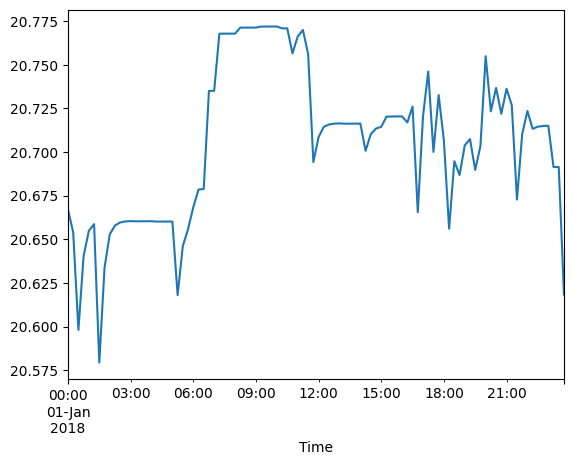

In [15]:
df['Temperature - Indoor (C)'].plot()

<Axes: xlabel='Time'>

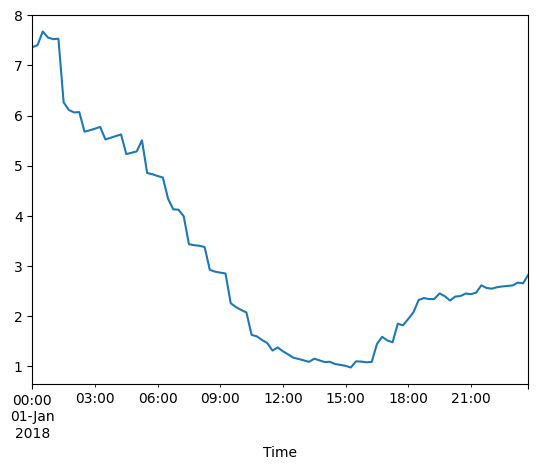

In [16]:
df['HVAC Heating Electric Power (kW)'].plot()